**REMEMBER:** Google/Wikipedia are your friends!! Search for any term you are not familiar with!
Try to get a rough idea of what each term is about. Be brave!


# An excuse to "play" with units and numerics

We have seen in class that the Goldman equation can be derived more rigourously from two basic hypotheses. It outperforms the ohmic approximation, that here is considered the Taylor's series first-order expansion around the reversal potential for each ionic species.


## Let's now write some Python!

We define two functions to numerically calculate the current density, according to the Goldman equation, for different ionic species. We plot and compare the results with the Ohmic approximation.

In [85]:
# Let's now use matplotlib as a graphical library and numpy as numerical library
import matplotlib.pyplot as plt
import numpy as np

R = 8.3         # J / (K Mole)
T = 37 + 273.15 # K
F = 96485.33    # C / mol
q = 1.602E-19   # C

def goldman(V, z, u, cin, cout):
  # note 1 V = Joule / Coulomb
  a = z * F / (R * T) # 1/V
  d = 6E-9            # m            -- thickness of the membrane
  P = u * 1./(abs(z) * q) * R * T / d   # Permeability -- m / (s mol) = m^3 / (s m^2 mol) = 1 / (s m^2 mM)

  return P * a * V * (cout - cin * np.exp(a * V)) / (1- np.exp(a * V))
# this is measured as particles per unit of time and unit of surface

# If I want to have an electrical current (density, i.e. C/(s m^2)) I must multiply by z * 1.602E-19 C.




def ohm(V, z, u, cin, cout):
  # note 1 V = Joule / Coulomb
  a = z * F / (R * T) # 1/V
  d = 6E-9            # m            -- thickness of the membrane
  P = u * 1./(abs(z) * q) * R * T / d   # Permeability -- m / (s mol) = m^3 / (s m^2 mol) = 1 / (s m^2 mM)
  E = R * T / (z * F) * np.log(cout/cin)

  return -P * a * cin * cout / (cin - cout) * np.log(cout/cin) * (V - E)
# this is measured as particles per unit of time and unit of surface

# If I want to have an electrical current (density, i.e. C/(s m^2)) I must multiply by z * 1.602E-19 C.


<Figure size 2000x2000 with 0 Axes>

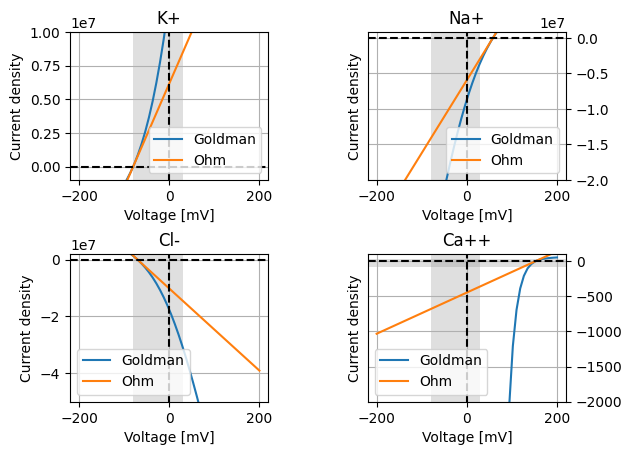

In [87]:


# https://www.priyamstudycentre.com/2021/07/ionic-mobility.html
## Mobility [m^2 / (s Volt)]
# K+  ---> 7.61E-8
# Na+ -->  5.20E-8
# Cl- ---> 7.90E-8
# Ca2+ --> 6.16E-8
# Mg2+ --> 5.50E-8

## Concentrations [m Mole/litre]
# K+    out: 20     in: 400
# Na+   out: 440    in: 50
# Cl-   out: 560    in: 40
# Ca++  out: 10     in: 1E-4

# Create a figure large
fig = plt.figure(figsize=(20,20))
# Leave more space in between the subplot
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)



V = np.linspace(-0.200, 0.200, 50)    # Volt


# For Potassium ions (K+) ------------------------------------------------------
z    = +1
cout = 20    # mMmole/litre
cin  = 400   # mMmole/litre
u    = 7.61E-8  # m^2/(s Volt) -- mobility
Jk = abs(z) * q * goldman(V, z, u, cin, cout)
Ek = R*T/(z*F) * np.log(cout/cin) * 1000.

jjk = abs(z) * q * ohm(V, z, u, cin, cout)


axs[0, 0].plot(V * 1000., Jk, V * 1000, jjk)
axs[0, 0].set_title('K+')


# For Sodium ions (Na+) --------------------------------------------------------
z    = +1
cout = 440      # mMmole/litre
cin  = 50       # mMmole/litre
u    = 5.2E-8   # m^2/(s Volt) -- mobility
Jna = abs(z) * q * goldman(V, z, u, cin, cout)
Ena = R*T/(z*F) * np.log(cout/cin) * 1000.
jjna = abs(z) * q * ohm(V, z, u, cin, cout)

axs[0, 1].plot(V * 1000., Jna, V* 1000., jjna)
axs[0, 1].set_title('Na+')


# For Chloride ions (Na+) --------------------------------------------------------
z    = -1
cout = 560      # mMmole/litre
cin  = 40       # mMmole/litre
u    = 7.9E-8   # m^2/(s Volt) -- mobility
Jcl  = abs(z) * q * goldman(V, z, u, cin, cout)
Ecl = R*T/(z*F) * np.log(cout/cin) * 1000.
jjcl = abs(z) * q * ohm(V, z, u, cin, cout)

axs[1, 0].plot(V * 1000., Jcl, V * 1000., jjcl)
axs[1, 0].set_title('Cl-')


# For Calcium ions (Ca++) --------------------------------------------------------
z    = +2
cout = 10           # mMmole/litre
cin  = 0.0001       # mMmole/litre
u    = 7.9E-8       # m^2/(s Volt) -- mobility
Jca = abs(z) * q * goldman(V, z, u, cin, cout)
Eca = R*T/(z*F) * np.log(cout/cin) * 1000.
jjca = abs(z) * q * ohm(V, z, u, cin, cout)

axs[1, 1].plot(V * 1000., Jca, V * 1000., jjca)
axs[1, 1].set_title('Ca++')

axs[0, 1].yaxis.tick_right()
axs[1, 1].yaxis.tick_right()

axs[0, 0].set_ylim(-1e6, 1e7)
axs[0, 1].set_ylim(-2e7, 8*1e5)
axs[1, 0].set_ylim(-0.5e8, 2*1e6)
axs[1, 1].set_ylim(-2e3, 1e2)



for ax in axs.flat:
    ax.set(xlabel='Voltage [mV]', ylabel='Current density')
    ax.grid()
    ax.legend(['Goldman', 'Ohm'])
    #ax.set_ylim(-1e6, 5*1e6)
    # Let's plot a cross at the center
    ax.axvline(x=0, color='k', linestyle='--')
    ax.axhline(y=0, color='k', linestyle='--')
    # Let's make a shaded region in the range [-0.08 ; +0.03]
    ax.axhspan(-80, 30, facecolor='0.5', alpha=0.25)
    ax.axvspan(-80, 30, facecolor='0.5', alpha=0.25)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
    #ax.label_outer()



# Some ideas or questions for you to answer (with increasing difficulty)

To answer these questions, you have to write code.

- what was the sampling interval, of the acquisition system used?
- what was the sampling rate?
- what was the average value of each signals?
- what happens to to the variance through time (say estimated in chunks of 1s each)?
- what was the average heart beat of MG?
- can you remove the 50 Hz noise from the trace?
- by spending no more than 5 min researching ECG on pubmed.com or Google, can you point in MG's ECG traces the (conventionally-chosen) *fiducial* points known as Q, R, S in the ECG, from which a doctor locate the P waves, the QRS complexes and the T waves ?
-  can you compute the typical parameters of interest: **height**  and   **interval**  of  each  wave,  such  as  the **R-R interval**, the **P-R interval**, the **QT interval** and the **S-T segment**?
- how does the power spectrum of the signal look like?
- how would a spectrogram look like for these signals?
